# Plotting Timeseries from Observational Data
*Akira Di Sandro, 6/23/20*
<br>
In this notebook, I will be plotting time series of transport from Marion's mooring data.

## 1.  Import packages and Load in data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
#!python
#!/usr/bin/env python
from scipy.io import loadmat
x = loadmat('../allTransport_SolomonStrait.mat')
# one-liner to read a single variable
#lon = loadmat('test.mat')['lon']

'1.0'

In [7]:
x['T'][42]

array([ 1.80407090e+01,  1.81200560e+01,  1.79149677e+01,  1.73007656e+01,
        1.62556215e+01,  1.49099874e+01,  1.35395321e+01,  1.24552205e+01,
        1.18225723e+01,  1.15632586e+01,  1.14634090e+01,  1.13816049e+01,
        1.13363625e+01,  1.14116285e+01,  1.16495084e+01,  1.20699507e+01,
        1.27416253e+01,  1.37472388e+01,  1.50493228e+01,  1.64149583e+01,
        1.75061695e+01,  1.80614174e+01,  1.80156024e+01,  1.74761095e+01,
        1.66074002e+01,  1.55333345e+01,  1.43259859e+01,  1.30420693e+01,
        1.17367186e+01,  1.04382515e+01,  9.15006185e+00,  7.91362577e+00,
        6.86516520e+00,  6.17246202e+00,  5.86167637e+00,  5.69248069e+00,
        5.25874176e+00,  4.29552921e+00,  2.95162468e+00,  1.76591552e+00,
        1.33759825e+00,  1.95124720e+00,  3.43563702e+00,  5.29953774e+00,
        6.98823635e+00,  8.09926831e+00,  8.49601092e+00,  8.30397731e+00,
        7.79889456e+00,  7.25517081e+00,  6.85317338e+00,  6.67065077e+00,
        6.69996852e+00,  

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [27]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

In [28]:
timestamps

DatetimeIndex(['2012-07-23', '2012-07-24', '2012-07-25', '2012-07-26',
               '2012-07-27', '2012-07-28', '2012-07-29', '2012-07-30',
               '2012-07-31', '2012-08-01',
               ...
               '2014-02-23', '2014-02-24', '2014-02-25', '2014-02-26',
               '2014-02-27', '2014-02-28', '2014-03-01', '2014-03-02',
               '2014-03-03', '2014-03-04'],
              dtype='datetime64[ns]', length=590, freq=None)

### b. Timestamps in vector format for python

In [29]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [39]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries

In [49]:
trans1 = x['T'][0]

In [52]:
len(trans1) == len(timestamps) == len(py_dt)

True

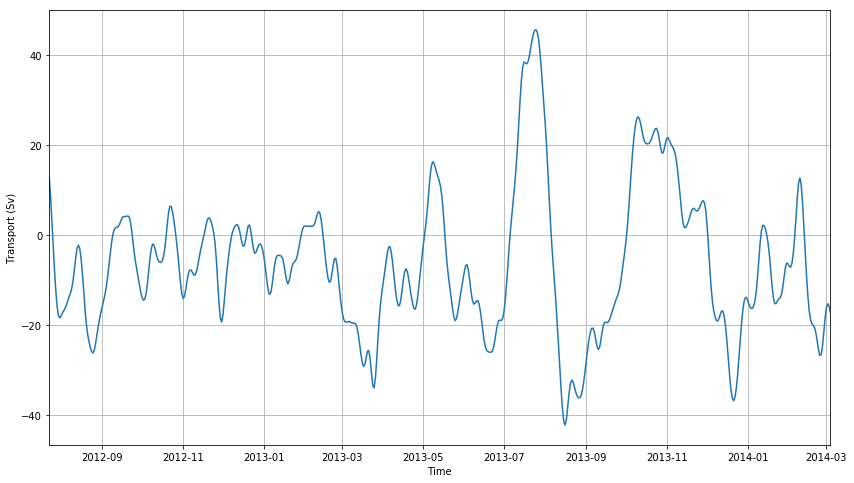

In [76]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, trans1)
ax.set_xlim(py_dt[0], py_dt[-1])
ax.grid(True)
trans1_plot = plt.show()

The above plot used 'SolomonStrait_geoBotRef_linearXsection_linear2bot_gcur4surf.mat'.